In [4]:
# generating lightcurve from data

import glob

import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt

from bts_phot import calibrate_fps





C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:66: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fp = pd.read_csv(fps_file,
C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ha = pd.read_csv(fps_file, skiprows=3, nrows=2,
C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:118: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rcid_df = pd.read_csv('cal_data/zp_thresholds_quadID.txt',


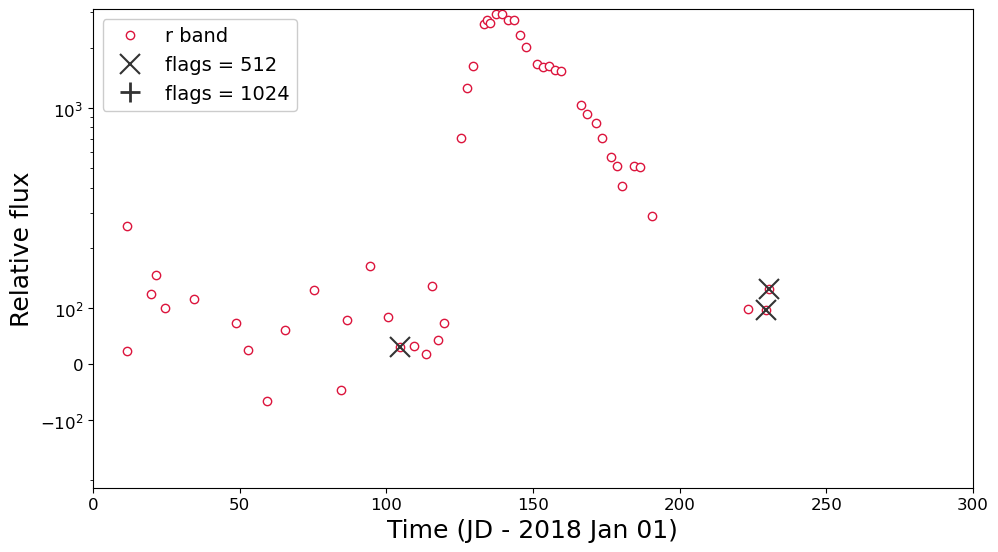

In [4]:
fp_df = calibrate_fps.read_ipac_fps('forced_phot_data/forced_phot_data_hlf.txt')

jdstart = 2460304.304
t_peak = 2460441.333
r_band = np.where(fp_df.fcqfid.values == 8621222)

bad_obs = np.where((fp_df.fcqfid.values == 8621222) &
                   ( (fp_df.infobitssci.values != 0)
                   )
                  )

no_output = np.where((fp_df.fcqfid.values == 8621222) &
                   ( (fp_df.forcediffimfluxunc.values < -99998)
                   )
                  )

roll_med = fp_df.iloc[r_band].forcediffimflux.rolling('14D', center=True).median().values


fig, ax = plt.subplots(figsize=(10,5.5))


ax.plot(fp_df.jd.values[r_band] - jdstart, 
        fp_df.forcediffimflux.values[r_band],
        'o', mec='Crimson', mfc='white', 
        label='r band')

ax.plot(fp_df.jd.values[bad_obs] - jdstart, 
        fp_df.forcediffimflux.values[bad_obs],
        'x', ms=14, mec='0.2', mew=1.5,
        label='flags = 512')

ax.plot(fp_df.jd.values[no_output] - jdstart, 
        fp_df.forcediffimflux.values[no_output],
        '+', ms=14, mec='0.2', mew=2,
        label='flags = 1024')


ax.set_xlim(0, 300)
ax.set_yscale('symlog', 
              linthresh=100, 
              linscale=0.25, 
              subs=[2, 3, 4, 5, 6, 7, 8, 9])
leg = ax.legend(loc=2, fontsize=14,  fancybox=True)
leg.get_frame().set_alpha(None)
leg.get_frame().set_facecolor((1,1,1,0.01))

ax.set_ylabel('Relative flux', fontsize=18)
ax.set_xlabel('Time (JD - 2018 Jan 01)', fontsize = 18)
ax.tick_params(axis='both', labelsize=12)
# fig.tight_layout()
fig.subplots_adjust(right=0.98, left=0.1, top=0.98)
fig.savefig('forced_images/hlf/flagged_obs.png', transparent=True)

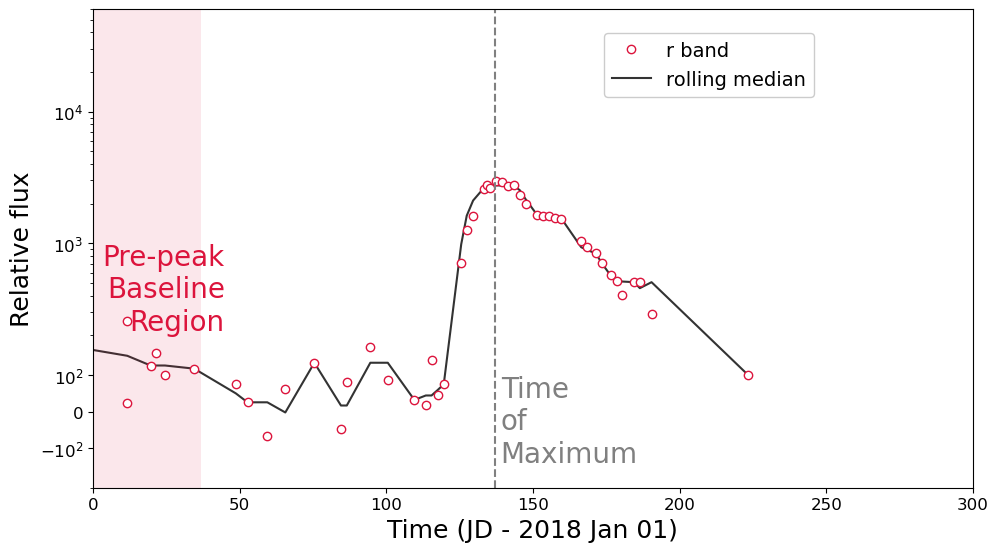

In [7]:
r_band = np.where((fp_df.fcqfid.values == 8621222) & 
                  (fp_df.infobitssci.values == 0) & 
                  (fp_df.forcediffimfluxunc.values > -99998)
                 )

around_max = np.where((fp_df.jd.values - t_peak > - 10) &
                      (fp_df.jd.values - t_peak < 10) & 
                      (fp_df.forcediffimflux.values > 0))
if len(around_max[0]) > 0:
    diff_flux_around_max = fp_df.forcediffimflux.values[around_max]
    mag_min = np.nanmin(fp_df.zpdiff.values[around_max] -
                        2.5*np.log10(diff_flux_around_max))
    #calculate time when SN signal is "gone" via Co56 decay at z ~ 0.09
    t_faded = t_peak + (22.5 - mag_min)/0.009



roll_med = fp_df.iloc[r_band].forcediffimflux.rolling('14D', center=True).median().values


fig, ax = plt.subplots(figsize=(10,5.5))

ax.plot(fp_df.jd.values[r_band] - jdstart, 
        fp_df.forcediffimflux.values[r_band],
        'o', mec='Crimson', mfc='white', 
        label='r band')

ax.plot(fp_df.jd.values[r_band] - jdstart, 
        roll_med, color='0.2', 
        label='rolling median', zorder=-10)


ax.axvline(x = t_peak - jdstart, 
           color = '0.5', ls = '--')


ax.set_xlim(0, 300)
ax.set_ylim(-200,6e4)
ax.set_yscale('symlog', 
              linthresh=100, 
              linscale=0.25, 
              subs=[2, 3, 4, 5, 6, 7, 8, 9])
leg = ax.legend(loc=9, fontsize=14, fancybox=True,
                bbox_to_anchor=(0.7,0.97), bbox_transform=ax.transAxes)
leg.get_frame().set_alpha(None)
leg.get_frame().set_facecolor((1,1,1,0.01))

ax.text(t_peak - jdstart+2, 1e2, 'Time\nof\nMaximum', 
        ha='left',va='top',
        fontsize=20, color='0.5')
ax.set_ylabel('Relative flux', fontsize=18)
ax.set_xlabel('Time (JD - 2018 Jan 01)', fontsize = 18)
ax.tick_params(axis='both', labelsize=12)
fig.subplots_adjust(right=0.98, left=0.1, top=0.98)
# fig.tight_layout()
fig.savefig('forced_images/hlf/flagged_obs.png', transparent=True)

ax.axvspan(0, t_peak - jdstart - 100, color='Crimson', alpha=0.1, lw=0)

ax.axvspan(t_faded - jdstart, 2500, color='Crimson', alpha=0.1, lw=0)

ax.text(45, 1e3, 'Pre-peak\nBaseline\nRegion', 
        ha='right',va='top',
        fontsize=20, color='Crimson')
#ax.text(1625, 1e3, 'Post-peak\nBaseline\nRegion', 
        #ha='left',va='top',
        #fontsize=20, color='Crimson')
fig.savefig('forced_images/hlf/flagged_obs.png', transparent=True)

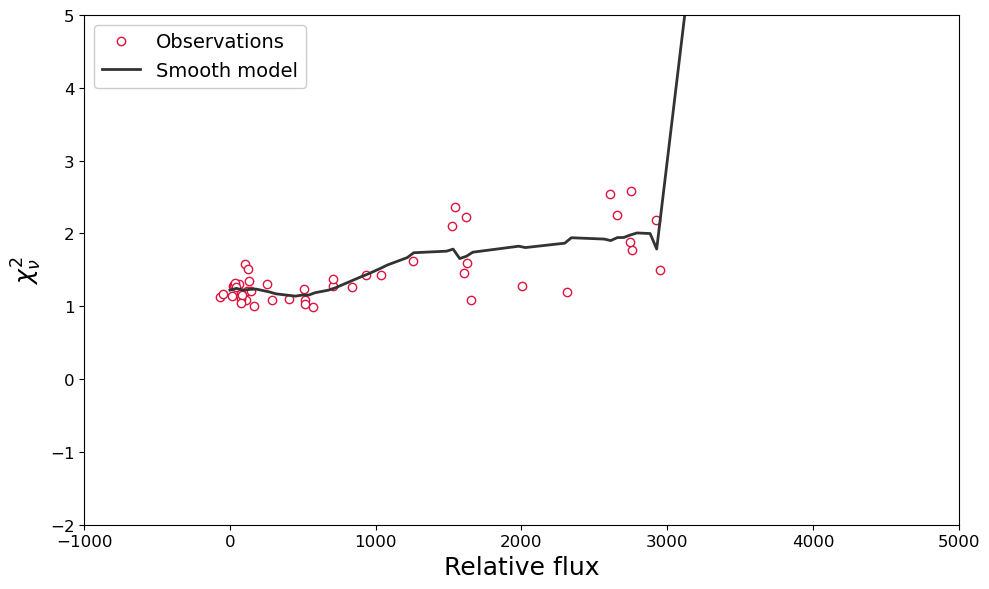

In [12]:
from supersmoother import SuperSmoother

model = SuperSmoother()

r_band = np.where((fp_df.fcqfid.values == 8621222) & 
                  (fp_df.infobitssci.values == 0) & 
                  (fp_df.forcediffimfluxunc.values > -99998)
                 )

model.fit(fp_df.forcediffimflux.iloc[r_band], 
          fp_df.forcediffimchisq.iloc[r_band])
# find the smoothed fit to the data
# interpolate to non-good obs
yfit = model.predict(np.sort(fp_df.forcediffimflux.iloc[r_band])) 
x_grid = np.linspace(0,45000,1000)
yfit = model.predict(x_grid) 


fig, ax = plt.subplots(figsize=(10,6))

ax.plot(fp_df.forcediffimflux.iloc[r_band], 
        fp_df.forcediffimchisq.iloc[r_band], 
        'o', color='Crimson', mfc='white',
       label='Observations')

ax.plot(x_grid, yfit, lw=2, color='0.2',
        label='Smooth model')

ax.set_xlabel('Relative flux', fontsize=18)
ax.set_ylabel(r'$\chi^2_\nu$', fontsize = 18)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc=2, fontsize=14, framealpha=1)

ax.set_xlim(-1000,5000)
ax.set_ylim(-2,5)
fig.tight_layout()
fig.savefig('forced_images/hlf/flux_dependent_scaling.jpg')

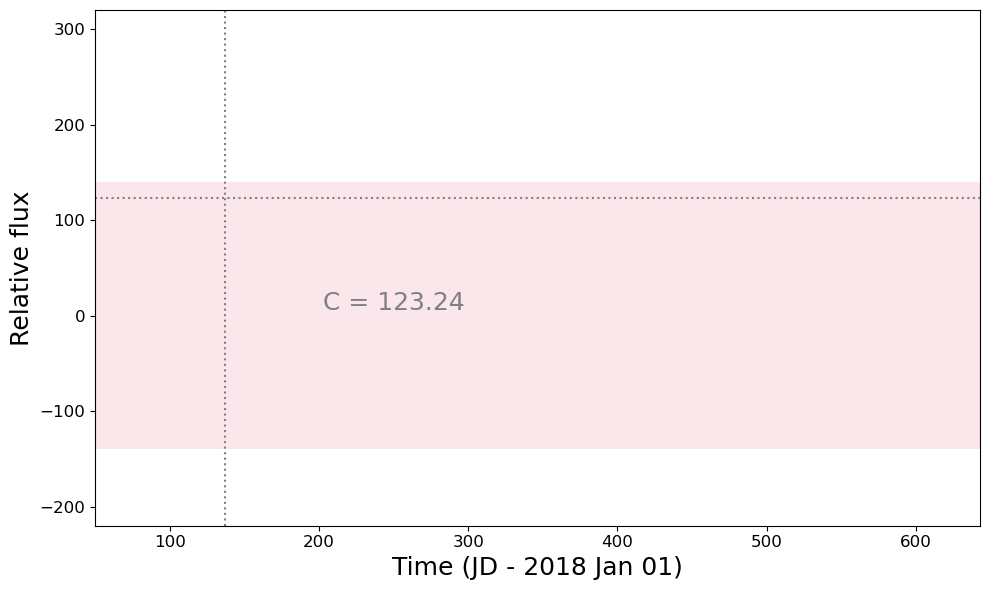

In [13]:
r_baseline = np.where((fp_df.fcqfid.values == 8621222) &
                      (t_peak - fp_df.jd.values > 100) & 
                      (fp_df.infobitssci.values == 0) & 
                      (fp_df.scisigpix.values < 25) & 
                      (fp_df.sciinpseeing.values < 5)
                     )

fig, ax = plt.subplots(figsize=(10,6))


ax.errorbar(fp_df.jd.values[r_baseline] - jdstart, 
            fp_df.forcediffimflux.values[r_baseline],
            fp_df.forcediffimfluxunc.values[r_baseline],
            fmt='o', mec='Crimson', mfc='white', ecolor='Crimson',
            label='r band')

# calculate baseline and scatter
Cmean = np.average(fp_df.forcediffimflux.values[r_baseline], 
                   weights=1/fp_df.forcediffimfluxunc.values[r_baseline]**2)
sum_diff_sq = np.sum( ( (fp_df.forcediffimflux.values[r_baseline] - Cmean) / 
                        (fp_df.forcediffimfluxunc.values[r_baseline])
                      )**2
                    )
chi = 1/(len(fp_df.jd.values[r_baseline])-1)*sum_diff_sq


ax.axvline(x = t_peak - jdstart, 
           color = '0.5', ls = ':')
ax.axhline(y = Cmean, color='0.5', ls =':')
ax.axhspan(-2*np.std(fp_df.forcediffimflux.values[r_baseline]), 
           2*np.std(fp_df.forcediffimflux.values[r_baseline]),
           color='Crimson', alpha=0.1, lw=0)

ax.set_xlim(50, 642.96)
ax.set_ylim(-220,320)
ax.text(250, 1, 'C = {:.2f}'.format(Cmean), 
        ha='center',va='bottom',
        fontsize=18, color='0.5')
ax.set_ylabel('Relative flux', fontsize=18)
ax.set_xlabel('Time (JD - 2018 Jan 01)', fontsize = 18)
ax.tick_params(axis='both', labelsize=12)
fig.tight_layout()
fig.savefig('forced_images/hlf/scale_uncertainties.jpg')

In [14]:
fp_df

,field,ccdid,qid,filter,pid,infobitssci,airmass,sciinpseeing,scibckgnd,scisigpix,...,aperturecorr,dnearestrefsrc,nearestrefmag,nearestrefmagunc,nearestrefchi,nearestrefsharp,refjdstart,refjdend,procstatus,fcqfid
2024-01-02 10:04:31.998712,862,12,2,ZTF_g,2557419814615,0,1.533128,2.5735,195.179,8.78344,...,1.068233,NaN,NaN,NaN,NaN,NaN,2.458203e+06,2.458431e+06,57,8621221
2024-01-06 09:22:44.999034,862,12,2,ZTF_r,2561390794615,0,1.576925,2.7304,249.740,7.55285,...,1.068235,NaN,NaN,NaN,NaN,NaN,2.458199e+06,2.458302e+06,57,8621222
2024-01-06 11:19:36.998417,862,12,2,ZTF_r,2561471954615,0,1.424199,3.0726,252.893,7.49670,...,1.084835,NaN,NaN,NaN,NaN,NaN,2.458199e+06,2.458302e+06,57,8621222
2024-01-14 10:44:02.996152,862,12,2,ZTF_g,2569447254615,0,1.427750,3.0369,199.229,5.77859,...,1.103006,NaN,NaN,NaN,NaN,NaN,2.458203e+06,2.458431e+06,57,8621221
2024-01-14 11:49:33.003843,862,12,2,ZTF_r,2569492744615,0,1.386104,2.6873,254.536,6.57911,...,1.074021,NaN,NaN,NaN,NaN,NaN,2.458199e+06,2.458302e+06,57,8621222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 07:44:48.001902,862,12,2,ZTF_r,2734322774615,0,1.833981,1.8563,237.622,8.91896,...,1.036699,NaN,NaN,NaN,NaN,NaN,2.458199e+06,2.458302e+06,57,8621222
2024-06-29 06:44:19.996797,862,12,2,ZTF_r,2736280784615,0,1.698416,2.3862,249.559,7.60828,...,1.061656,NaN,NaN,NaN,NaN,NaN,2.458199e+06,2.458302e+06,57,8621222
2024-06-29 08:16:31.998737,862,12,2,ZTF_g,2736344814615,0,1.953065,2.3092,184.084,7.58099,...,1.063390,NaN,NaN,NaN,NaN,NaN,2.458203e+06,2.458431e+06,57,8621221
2024-07-03 06:24:55.998725,862,12,2,ZTF_r,2740267314615,0,1.689937,1.9752,243.479,7.57456,...,1.047460,NaN,NaN,NaN,NaN,NaN,2.458199e+06,2.458302e+06,57,8621222


In [21]:
cal_flux = fp_df.forcediffimflux.values[r_band] - Cmean
#what do we scale uncertainties by?
cal_flux_err = fp_df.forcediffimfluxunc.values[r_band] 
SNT = 3
SNU = 5

if ((cal_flux / cal_flux_err) > SNT ):
    # we have a “confident” detection, compute and plot mag with error bar:
    cal_mag = zpdiff - 2.5*np.log10(forcediffimflux)
    σmag = 1.0857* cal_flux_err / cal_flux
else:
    # compute flux upper limit and plot as arrow:
    cal_mag = zpdiff - 2.5*np.log10(SNU*cal_flux_err)

cal_mag


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:66: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fp = pd.read_csv(fps_file,
C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ha = pd.read_csv(fps_file, skiprows=3, nrows=2,
C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:118: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rcid_df = pd.read_csv('cal_data/zp_thresholds_quadID.txt',


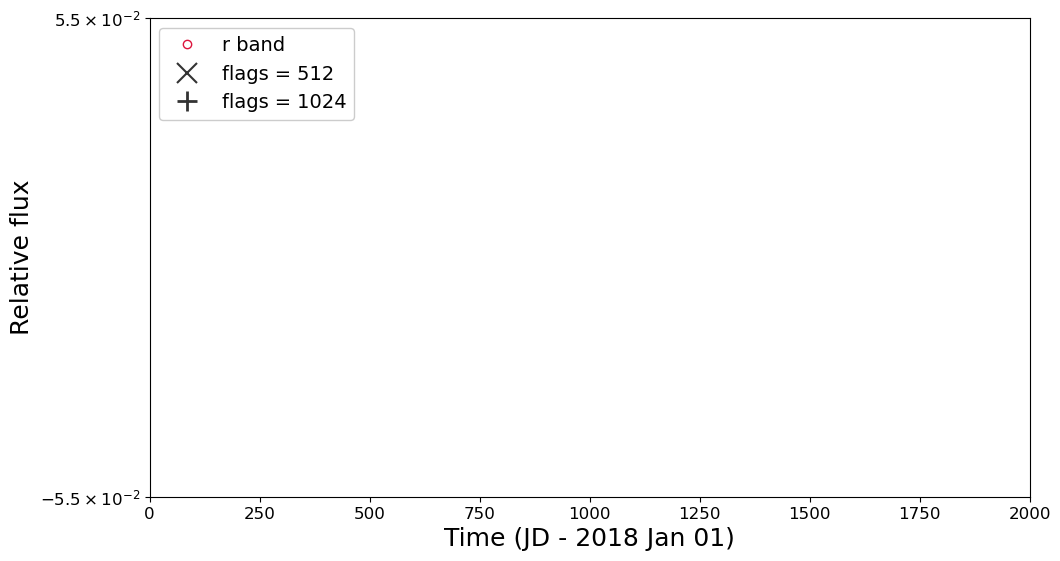

In [4]:
fp_df = calibrate_fps.read_ipac_fps('forced_phot_data/forced_phot_data_inv.txt')

jdstart = 24603312
t_peak = 2460455.3
r_band = np.where(fp_df.fcqfid.values == 8621222)

bad_obs = np.where((fp_df.fcqfid.values == 8621222) &
                   ( (fp_df.infobitssci.values != 0)
                   )
                  )

no_output = np.where((fp_df.fcqfid.values == 8621222) &
                   ( (fp_df.forcediffimfluxunc.values < -99998)
                   )
                  )

roll_med = fp_df.iloc[r_band].forcediffimflux.rolling('14D', center=True).median().values


fig, ax = plt.subplots(figsize=(10,5.5))


ax.plot(fp_df.jd.values[r_band] - jdstart, 
        fp_df.forcediffimflux.values[r_band],
        'o', mec='Crimson', mfc='white', 
        label='r band')

ax.plot(fp_df.jd.values[bad_obs] - jdstart, 
        fp_df.forcediffimflux.values[bad_obs],
        'x', ms=14, mec='0.2', mew=1.5,
        label='flags = 512')

ax.plot(fp_df.jd.values[no_output] - jdstart, 
        fp_df.forcediffimflux.values[no_output],
        '+', ms=14, mec='0.2', mew=2,
        label='flags = 1024')


ax.set_xlim(0, 2000)
ax.set_yscale('symlog', 
              linthresh=100, 
              linscale=0.25, 
              subs=[2, 3, 4, 5, 6, 7, 8, 9])
leg = ax.legend(loc=2, fontsize=14,  fancybox=True)
leg.get_frame().set_alpha(None)
leg.get_frame().set_facecolor((1,1,1,0.01))

ax.set_ylabel('Relative flux', fontsize=18)
ax.set_xlabel('Time (JD - 2018 Jan 01)', fontsize = 18)
ax.tick_params(axis='both', labelsize=12)
# fig.tight_layout()
fig.subplots_adjust(right=0.98, left=0.1, top=0.98)
fig.savefig('forced_images/hlf/flagged_obs.png', transparent=True)

In [10]:
fp_df.forcediffimflux

2023-06-09 08:45:27.999379     60.933783
2023-06-14 07:13:53.002549      0.311750
2023-06-14 08:23:06.000019    -34.629184
2023-06-17 06:45:27.000014     45.992538
2023-06-17 08:47:13.001263      2.318169
                                 ...    
2024-08-10 05:43:31.998720    241.875270
2024-08-11 04:47:37.000302     97.527633
2024-08-11 05:18:35.999995     60.268066
2024-08-12 04:36:00.002875    125.081650
2024-08-12 05:19:40.998717     61.118983
Name: forcediffimflux, Length: 135, dtype: float64

In [3]:
a = calibrate_fps.get_baseline('forced_phot_data/forced_phot_data_hlf.txt', window="14D",
                 write_lc=True,
                 make_plot=True,
                 save_fig=True)

ZTFforced_ph


C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:66: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fp = pd.read_csv(fps_file,
C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ha = pd.read_csv(fps_file, skiprows=3, nrows=2,
C:\Users\ranvi\AppData\Roaming\Python\Python311\site-packages\bts_phot\calibrate_fps.py:118: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rcid_df = pd.read_csv('cal_data/zp_thresholds_quadID.txt',


Warning! scaled unc are underestimated
ZTFforced_ph 8621222 has chi2nu = 3.587


In [14]:

import sncosmo

data = sncosmo.load_example_data()

model = sncosmo.Model(source='salt2')


result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],
     bounds={'z':(0.3, 0.7)})

ValueError: Minimization method 'minuit' requires the iminuit package

In [1]:
import astropy
astropy.__version__

'6.1.2'

In [15]:
pip install iminuit

  Obtaining dependency information for iminuit from https://files.pythonhosted.org/packages/5b/c2/5ccf2e27cff93b81e74ca945f8d3f00264dff909c96f39c2b472bcc4557d/iminuit-2.28.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/361.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/361.2 kB ? eta -:--:--
   ---------- ----------------------------- 92.2/361.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 286.7/361.2 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  358.4/361.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 361.2/361.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\ranvi\anaconda3\lib\site-packages\bts_phot-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\ranvi\anaconda3\lib\site-packages\supersmoother-0.4-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
